# Take Home Assignment - E/20/197

## Introduction
This project focuses on analyzing the Mushroom dataset to predict whether a mushroom is poisonous(p) or edible(e).

## Dataset Description
- **Source:** UCI Machine Learning Repository
- **Domain:** Biology
- **Number of Features:** 22
- **Number of Records:** 8124 instances
- **Target Variable:** poisonous (p = poisonous , e = edible)
- **Goal:** To perform multiple classification models, including Logistic Regression, SVM, Naïve Bayes and Random Forest and evaluate model performance using metrics like accuracy, precision, recall, F1-score and confusion matrix.


### Load and Inspect the Dataset

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
mushroom = fetch_ucirepo(id=73)

# data (as pandas dataframes)
X = mushroom.data.features
y = mushroom.data.targets

# Combine for inspection of the dataset
data = pd.concat([X, y], axis=1)

# First few rows
print("First few rows:")
print(data.head())

# Dataset info
print("\nDataset Info:")
print(data.info())

# Distribution of target variable
print("\nTarget Variable Distribution:")
print(y.value_counts())

First few rows:
  cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing  \
0         x           s         n       t    p               f            c   
1         x           s         y       t    a               f            c   
2         b           s         w       t    l               f            c   
3         x           y         w       t    p               f            c   
4         x           s         g       f    n               f            w   

  gill-size gill-color stalk-shape  ... stalk-color-above-ring  \
0         n          k           e  ...                      w   
1         b          k           e  ...                      w   
2         b          n           e  ...                      w   
3         n          n           e  ...                      w   
4         b          k           t  ...                      w   

  stalk-color-below-ring veil-type veil-color ring-number ring-type  \
0                      w         p       

## Data Preprocessing

### Data Cleaning - Check for Missing Values

In [3]:
# Check if any missing values exist
print("\nMissing values in dataset:")
print(data.isnull().sum())


Missing values in dataset:
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
poisonous                      0
dtype: int64


In stalk-root, there is a considerable amount of missing values.

Replace Missing Values in stalk-root by using the most common value

In [4]:
# Replace missing values in 'stalk-root' with mode
X['stalk-root'].fillna(X['stalk-root'].mode()[0], inplace=True)

# Verfication of there is no any missing values
print(X.isnull().sum())

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


/tmp/ipython-input-1529323674.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['stalk-root'].fillna(X['stalk-root'].mode()[0], inplace=True)
/tmp/ipython-input-1529323674.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['stalk-root'].fillna(X['stalk-root'].mode()[0], inplace=True)


### Data Transformation
Encode Categorical Variables


*   All the features are in categorical type, except a binary type one. Hence I have handled veli-type separately. Then other features have been encoded with LabelEncoder.



In [5]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

# Step 0: Make a copy of X to avoid modifying original data
X = X.copy()

# Step 1: Manual binary encoding for binary features
binary_map = {
    'veil-type': {'p': 1, 'u': 0}
}
for col, mapping in binary_map.items():
    # X.loc[:, col] = X[col].map(mapping)
    X.loc[:, col] = X[col].map(mapping).astype(float)

# Step 2: Label Encoding for remaining categorical features
label_enc = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X.loc[:, col] = label_enc.fit_transform(X[col].astype(str))

X = X.apply(pd.to_numeric, errors='raise')

# Apply to target
y = labelencoder.fit_transform(y)

print("\nData Types of Encoded Features:")
print(X.dtypes)


Data Types of Encoded Features:
cap-shape                   int64
cap-surface                 int64
cap-color                   int64
bruises                     int64
odor                        int64
gill-attachment             int64
gill-spacing                int64
gill-size                   int64
gill-color                  int64
stalk-shape                 int64
stalk-root                  int64
stalk-surface-above-ring    int64
stalk-surface-below-ring    int64
stalk-color-above-ring      int64
stalk-color-below-ring      int64
veil-type                   int64
veil-color                  int64
ring-number                 int64
ring-type                   int64
spore-print-color           int64
population                  int64
habitat                     int64
dtype: object


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Exploratory Data Analysis (EDA)

### Class Distribution

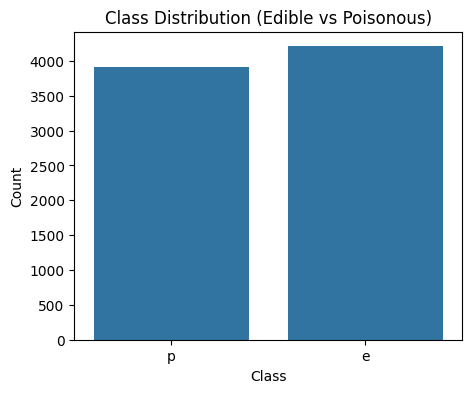

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,4))
sns.countplot(x='poisonous', data=data)
plt.title("Class Distribution (Edible vs Poisonous)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

### Feature Distributions

Count plots were generated for features to visualize the distribution of their levels. This analysis also confirmed that certain columns, such as veil-type, carry little to no variability and can be excluded from further analysis.

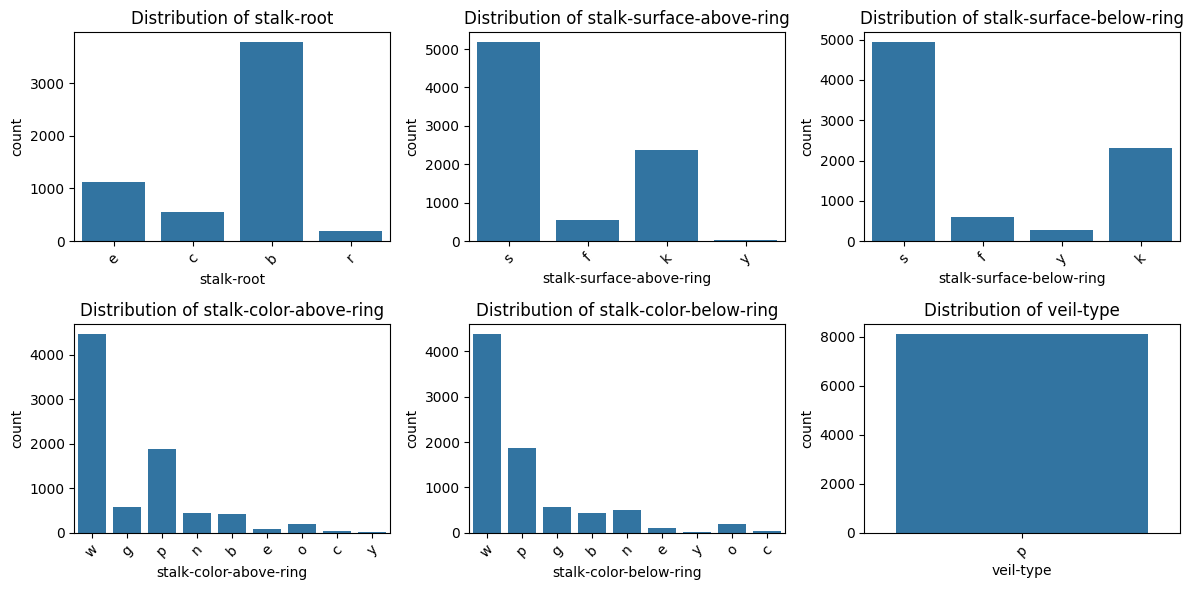

In [7]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(data.columns[10:16], 1):  # first 6 features as sample
    plt.subplot(2, 3, i)
    sns.countplot(x=col, data=data)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

By exploring feature distributions, I could see that the veli-type is common to all the instances. Hence proceeding with it does not make any value. Hence it has been dropped.

In [8]:
if X['veil-type'].nunique() == 1:
    X.drop('veil-type', axis=1, inplace=True)

### Correlation Analysis

Correlation matrix tells that several features have not that much affecting to the result, Hence we can conclude that they can be dropped or apply any feature enginnering methods on those features.



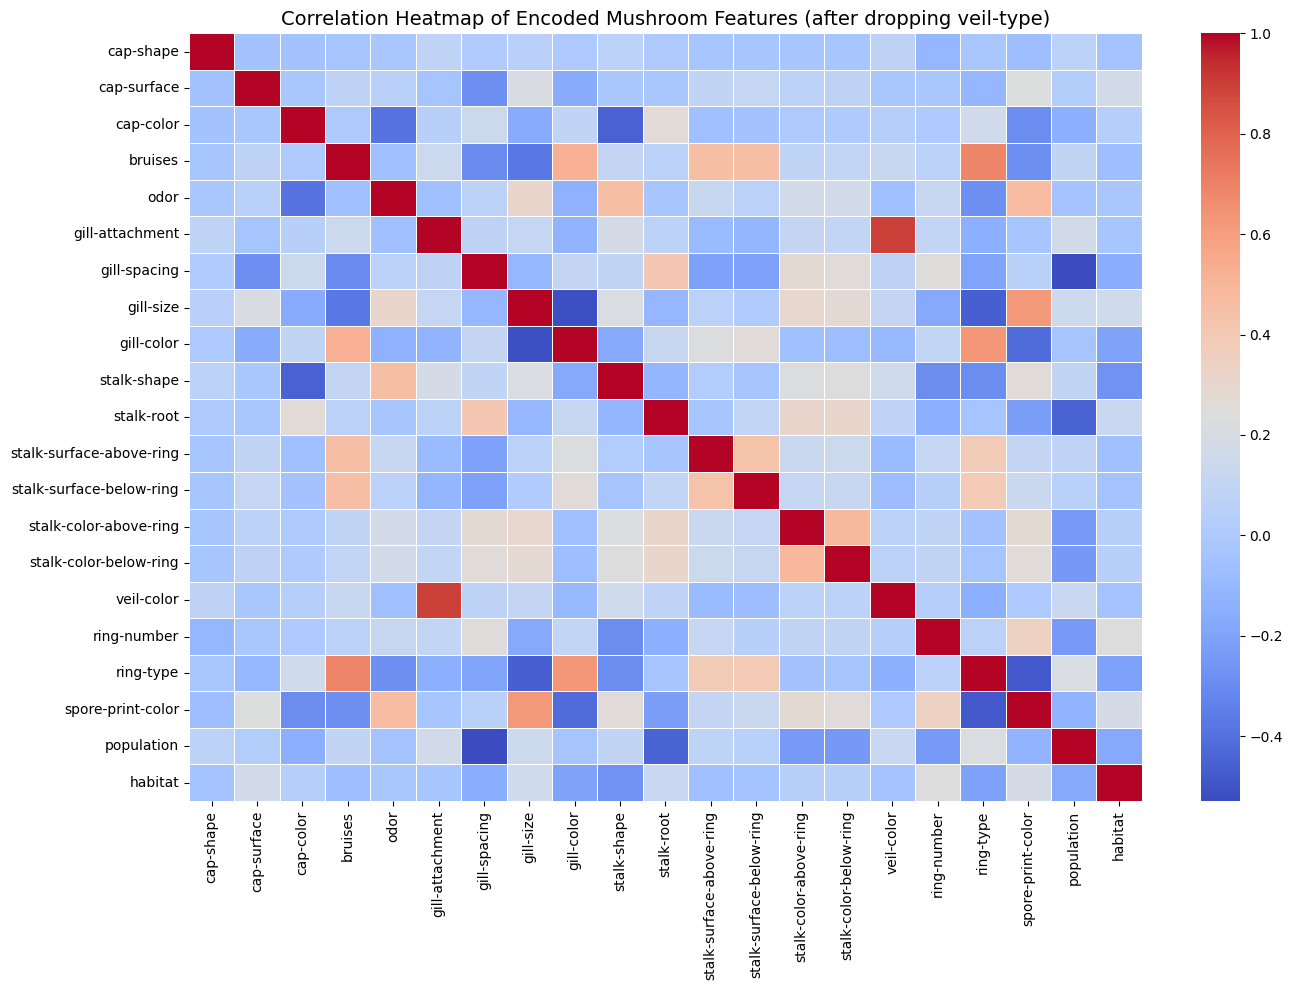

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Safety check: Ensure X has only numeric values
assert X.dtypes.apply(lambda dt: np.issubdtype(dt, np.number)).all(), "X contains non-numeric columns"

# Step 1: Compute correlation matrix on the updated X
corr_matrix = X.corr()

# Step 2: Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Encoded Mushroom Features (after dropping veil-type)", fontsize=14)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Class-wise Feature Analysis
By examimng the Class-wise feature analysis, we can have a better understanding about the features that are affect more on the final output.

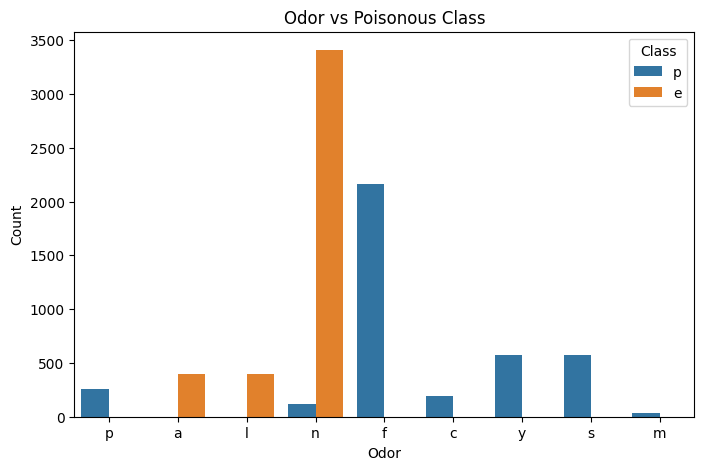

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(x='odor', hue='poisonous', data=data)
plt.title("Odor vs Poisonous Class")
plt.xlabel("Odor")
plt.ylabel("Count")
plt.legend(title="Class")
plt.show()

## Feature Engineering - Feature Selection and Feature Extraction
### Feature Selection
In this data set, all the feaures are categorical. Hence I have used Chi-Squared method to select the top features to prceed with.

Top selected features:
gill-color: 5957.76
ring-type: 1950.61
gill-size: 1636.61
stalk-root: 1358.36
bruises: 1194.28
gill-spacing: 826.80
habitat: 751.31
spore-print-color: 379.13
population: 311.77
stalk-surface-above-ring: 222.98
cap-surface: 214.07
stalk-surface-below-ring: 206.65
stalk-color-above-ring: 119.79
stalk-color-below-ring: 109.79
odor: 75.91
stalk-shape: 36.59
ring-number: 25.65
cap-shape: 17.51
cap-color: 11.51
veil-color: 5.13
gill-attachment: 3.51


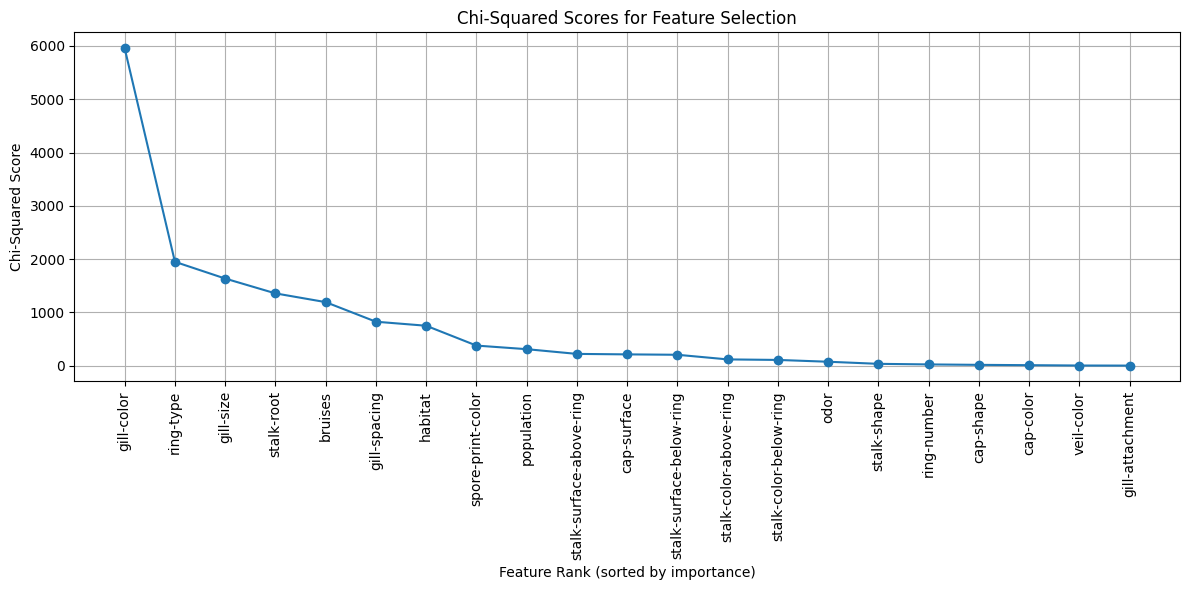

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2

# Step 1: Compute Chi-Squared scores
chi_scores, p_values = chi2(X, y)

# Step 2: Create a DataFrame for scores
chi_df = pd.DataFrame({
    'feature': X.columns,
    'chi2_score': chi_scores,
    'p_value': p_values
})

# Step 3: Filter out NaN or zero scores
chi_df = chi_df.dropna()
chi_df = chi_df[chi_df['chi2_score'] > 0]

# Step 4: Sort by score
chi_df_sorted = chi_df.sort_values(by='chi2_score', ascending=False)

# Step 5: Display sorted features
print("Top selected features:")
for _, row in chi_df_sorted.iterrows():
    print(f"{row['feature']}: {row['chi2_score']:.2f}")

# Step 6: Plot Chi-Squared scores
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(chi_df_sorted)+1), chi_df_sorted['chi2_score'], marker='o', linestyle='-')
plt.title("Chi-Squared Scores for Feature Selection")
plt.xlabel("Feature Rank (sorted by importance)")
plt.ylabel("Chi-Squared Score")
plt.xticks(ticks=range(1, len(chi_df_sorted)+1), labels=chi_df_sorted['feature'], rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

In this plot, we can see the knee point and upto that feature, we can consider as the top.

In [12]:
top_k = 10
top_features = chi_df_sorted['feature'].head(top_k).tolist()
X_top = X[top_features].copy()


print("\nTop 10 features stored in X_top:")
print(X_top.head())


Top 10 features stored in X_top:
   gill-color  ring-type  gill-size  stalk-root  bruises  gill-spacing  \
0           4          4          1           2        1             0   
1           4          4          0           1        1             0   
2           5          4          0           1        1             0   
3           5          4          1           2        1             0   
4           4          0          0           2        0             1   

   habitat  spore-print-color  population  stalk-surface-above-ring  
0        5                  2           3                         2  
1        1                  3           2                         2  
2        3                  3           2                         2  
3        5                  2           3                         2  
4        1                  3           0                         2  


### Feature Extraction

In [13]:
pip install prince

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.9/178.9 kB 856.1 kB/s eta 0:00:00


In [14]:
import prince

# Fit MCA
mca = prince.MCA(
    n_components=5,
    n_iter=5,
    copy=True,
    check_input=True,
    engine='scipy',
    random_state=42
)

mca = mca.fit(X_top)

# Transform into MCA components
X_mca = mca.transform(X_top)

print("\nFirst few MCA components:")
print(X_mca.head())

# Explained inertia
print("\nExplained inertia (variance ratio) per component:")
# eigenvalues of MCA
eigenvalues = mca.eigenvalues_
# proportion of explained inertia per component
explained_inertia = eigenvalues / sum(eigenvalues)
print("Explained inertia per component:")
print(explained_inertia)



First few MCA components:
          0         1         2         3         4
0  0.794349  0.559657 -0.347650  0.379990  0.020811
1  1.092836  0.069672 -0.270260 -0.053316 -1.282170
2  1.183441 -0.448798 -0.509204  0.054153 -1.720359
3  0.740042  0.310851 -0.375622  0.426268  0.267244
4  0.661172  1.679126  0.076866 -0.123285  0.094114

Explained inertia (variance ratio) per component:
Explained inertia per component:
[0.28037881 0.21845012 0.21132266 0.15566121 0.1341872 ]


80% Threshold has considered to get the optimal number of MCAs.

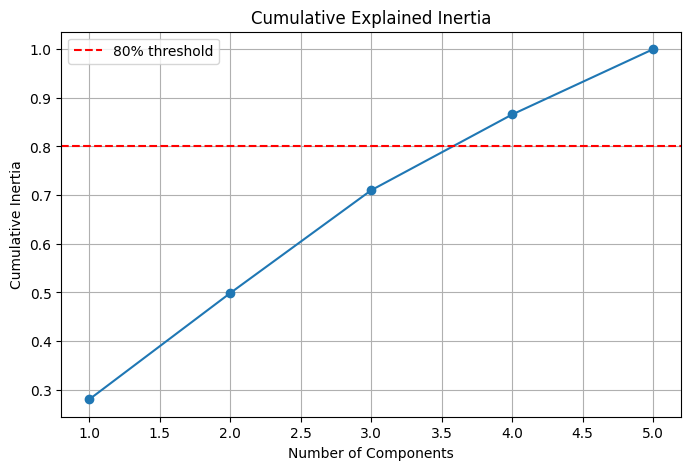

In [15]:
import matplotlib.pyplot as plt
cumulative_inertia = np.cumsum(explained_inertia)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_inertia)+1), cumulative_inertia, marker='o')
plt.axhline(y=0.80, color='r', linestyle='--', label='80% threshold')
plt.title("Cumulative Explained Inertia")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Inertia")
plt.legend()
plt.grid(True)
plt.show()

In [16]:
import numpy as np

cumulative_inertia = np.cumsum(explained_inertia)
optimal_k = np.argmax(cumulative_inertia >= 0.80) + 1  # +1 for index offset
print(f"Optimal number of components to retain ≥80% inertia: {optimal_k}")

Optimal number of components to retain ≥80% inertia: 4


## Modeling



Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       842
           1       0.94      0.80      0.86       783

    accuracy                           0.88      1625
   macro avg       0.89      0.88      0.88      1625
weighted avg       0.89      0.88      0.88      1625



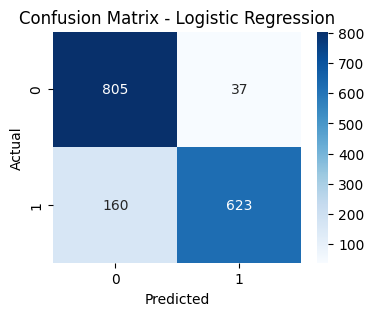


Model: SVM (RBF)
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       842
           1       0.95      0.97      0.96       783

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



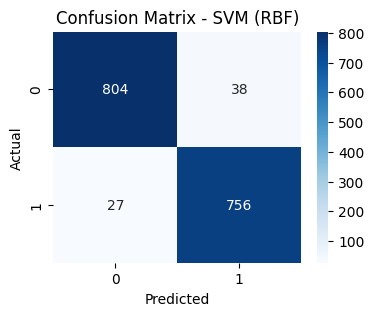


Model: Naive Bayes
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       842
           1       0.92      0.82      0.87       783

    accuracy                           0.88      1625
   macro avg       0.89      0.88      0.88      1625
weighted avg       0.89      0.88      0.88      1625



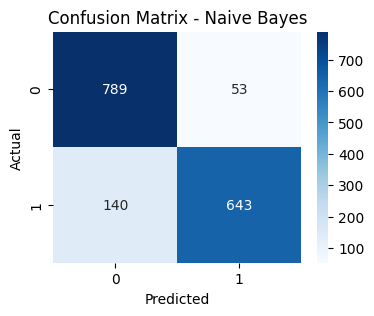


Model Comparison:
                  Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.878769   0.887076  0.878769  0.877728
1            SVM (RBF)  0.960000   0.960104  0.960000  0.960008
2          Naive Bayes  0.881231   0.885222  0.881231  0.880655


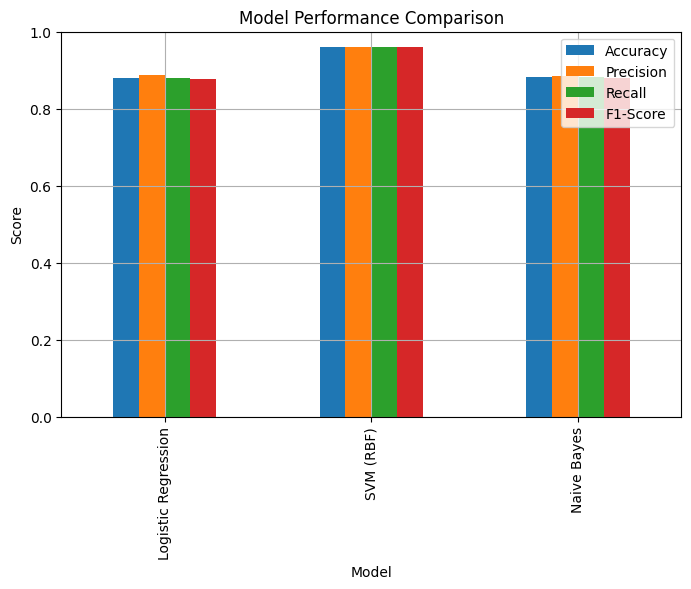

In [17]:
# Train-Test Split BEFORE MCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import prince

# Split into train and test BEFORE MCA
X_train, X_test, y_train, y_test = train_test_split(
    X_top, y, test_size=0.2, random_state=42, stratify=y
)

# Fit MCA only on training data
mca = prince.MCA(n_components=4, random_state=42)
mca.fit(X_train)

X_train_mca = mca.transform(X_train)
X_test_mca = mca.transform(X_test)

# Define Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM (RBF)": SVC(kernel='rbf', probability=True),
    "Naive Bayes": GaussianNB()
}

results = []

# Train & Evaluate Models
for model_name, model in models.items():
    # Train
    model.fit(X_train_mca, y_train)

    # Predict
    y_pred = model.predict(X_test_mca)

    # Calculate Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store Results
    results.append([model_name, acc, prec, rec, f1])

    # Print Report
    print(f"\nModel: {model_name}")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Compare Results
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
print("\nModel Comparison:\n", results_df)

# Plot comparison
results_df.set_index("Model")[["Accuracy", "Precision", "Recall", "F1-Score"]].plot(
    kind='bar', figsize=(8,5)
)
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0,1)
plt.grid(True)
plt.show()


### Model Improvement
According to the above results, the best performed model is SVM. Hence I have work on that to improve the performance using GridSearchCV.



 Starting Hyperparameter Tuning...

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best SVM Params: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV Score: 0.9852274530704094

Tuned SVM Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       842
           1       0.99      0.99      0.99       783

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625


Tuned Model Comparison:
          Model  Accuracy  Precision    Recall  F1-Score
0  SVM (Tuned)  0.990154   0.990156  0.990154  0.990153


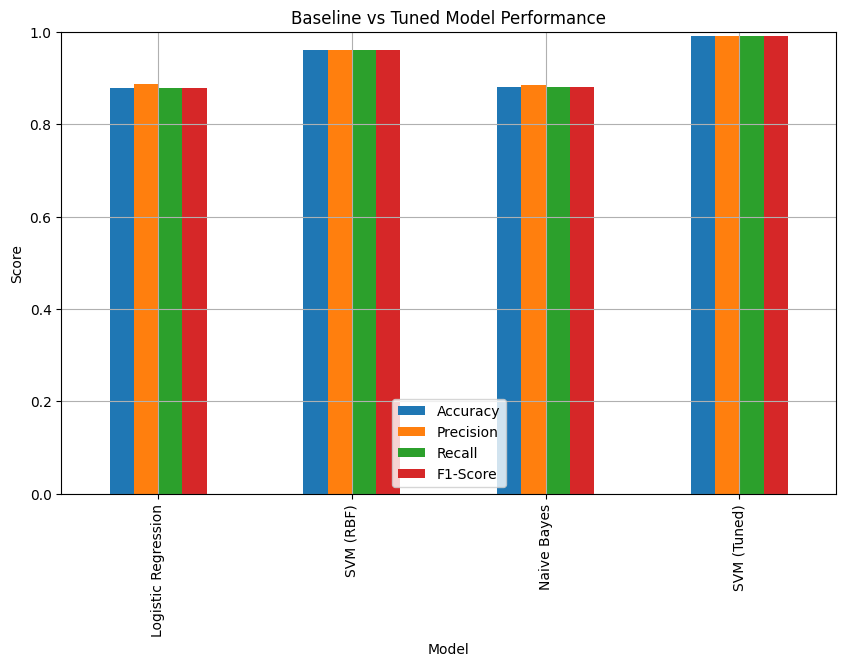

In [19]:
from sklearn.model_selection import GridSearchCV

print("\n\n Starting Hyperparameter Tuning...\n")

# SVM Tuning
svm_model = SVC(probability=True)
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.001],
    'kernel': ['rbf']
}

grid_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_svm.fit(X_train_mca, y_train)

print("\nBest SVM Params:", grid_svm.best_params_)
print("Best CV Score:", grid_svm.best_score_)

y_pred_svm = grid_svm.predict(X_test_mca)
print("\nTuned SVM Report:\n", classification_report(y_test, y_pred_svm))


# Collect Tuned Results
tuned_results = [
    ["SVM (Tuned)", accuracy_score(y_test, y_pred_svm),
     precision_score(y_test, y_pred_svm, average='weighted'),
     recall_score(y_test, y_pred_svm, average='weighted'),
     f1_score(y_test, y_pred_svm, average='weighted')],
]

tuned_results_df = pd.DataFrame(tuned_results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
print("\nTuned Model Comparison:\n", tuned_results_df)

# Compare Baseline vs Tuned
combined_df = pd.concat([results_df.set_index("Model"), tuned_results_df.set_index("Model")])
combined_df.plot(kind='bar', figsize=(10,6))
plt.title("Baseline vs Tuned Model Performance")
plt.ylabel("Score")
plt.ylim(0,1)
plt.grid(True)
plt.show()

## Ensemble Learning - Bagging
### Random Forest

Random Forest Accuracy: 1.0
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



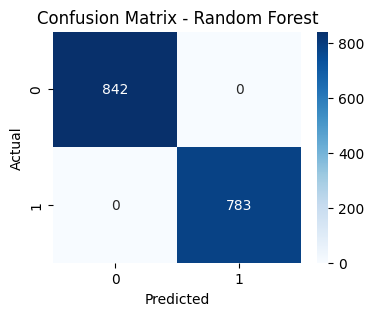

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train Random Forest (default params, except random_state for reproducibility)
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Fit on training data
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()